# Migration flows

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading data

In [3]:
# Load the Excel file with all sheets
file_path = '/Users/judithyemeli/Downloads/countymcd-to-countymcd-2016-2020-ins-outs-nets-gross.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)  # Load all sheets as a dictionary

# Concatenate all sheets into a single DataFrame
df = pd.concat(excel_data.values(), ignore_index=True)

# Display the first few rows of the combined data for verification
df.head()

,Table with column headers in rows 2 through 3.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of ...,FIPS County Code of Geography B,FIPS Minor Civil Division (MCD) Code of Geogra...,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geogr...,County Name of Geography B,Minor Civil Division of Geography B,Flow from Geography B to Geography A,NaN,Counterflow from Geography A to Geography B2,NaN,Net Migration from Geography B to Geography A2,NaN,Gross Migration between Geography A and Geogra...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE,NaN,NaN
2,001,001,001,003,NaN,Alabama,Autauga County,Alabama,Baldwin County,-,30,37,489,395,-459,396,519,398,NaN,NaN
3,001,001,001,005,NaN,Alabama,Autauga County,Alabama,Barbour County,-,5,8,0,23,5,8,5,8,NaN,NaN
4,001,001,001,007,NaN,Alabama,Autauga County,Alabama,Bibb County,-,12,18,48,61,-36,62,60,65,NaN,NaN


In [4]:
all_data = df.copy()

In [5]:
len(all_data)

716817

## Cleaning data

In [6]:
all_data = all_data.iloc[:, :-2]
all_data.dropna(axis=1, subset=[0], inplace=True)
all_data.head(2)

,Table with column headers in rows 2 through 3.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16
0,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of ...,FIPS County Code of Geography B,FIPS Minor Civil Division (MCD) Code of Geogra...,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geogr...,County Name of Geography B,Minor Civil Division of Geography B,Flow from Geography B to Geography A,Counterflow from Geography A to Geography B2,Net Migration from Geography B to Geography A2,Gross Migration between Geography A and Geogra...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estimate,Estimate,Estimate,Estimate


In [7]:
column_names = all_data.iloc[0:2].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0).to_dict()

In [8]:
column_names

{'Table with column headers in rows 2 through 3.': 'State Code of Geography A',
 'Unnamed: 1': 'FIPS County Code of Geography A',
 'Unnamed: 2': 'State/U.S. Island Area/Foreign Region Code of Geography B',
 'Unnamed: 3': 'FIPS County Code of Geography B',
 'Unnamed: 4': 'FIPS Minor Civil Division (MCD) Code of Geography B1',
 'Unnamed: 5': 'State Name of Geography A',
 'Unnamed: 6': 'County Name of Geography A',
 'Unnamed: 7': 'State/U.S. Island Area/Foreign Region of Geography B',
 'Unnamed: 8': 'County Name of Geography B',
 'Unnamed: 9': 'Minor Civil Division of Geography B',
 'Unnamed: 10': 'Flow from Geography B to Geography A Estimate',
 'Unnamed: 12': 'Counterflow from Geography A to Geography B2 Estimate',
 'Unnamed: 14': 'Net Migration from Geography B to Geography A2 Estimate',
 'Unnamed: 16': 'Gross Migration between Geography A and Geography B2 Estimate'}

In [9]:
all_data.rename(columns=column_names, inplace=True)
all_data = all_data.iloc[2:]
all_data.head(2)

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,FIPS Minor Civil Division (MCD) Code of Geography B1,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Minor Civil Division of Geography B,Flow from Geography B to Geography A Estimate,Counterflow from Geography A to Geography B2 Estimate,Net Migration from Geography B to Geography A2 Estimate,Gross Migration between Geography A and Geography B2 Estimate
2,001,001,001,003,NaN,Alabama,Autauga County,Alabama,Baldwin County,-,30,489,-459,519
3,001,001,001,005,NaN,Alabama,Autauga County,Alabama,Barbour County,-,5,0,5,5


In [10]:
all_data.dropna(subset=all_data.columns, inplace=True)
all_data.head(2)

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,FIPS Minor Civil Division (MCD) Code of Geography B1,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Minor Civil Division of Geography B,Flow from Geography B to Geography A Estimate,Counterflow from Geography A to Geography B2 Estimate,Net Migration from Geography B to Geography A2 Estimate,Gross Migration between Geography A and Geography B2 Estimate
77,001,001,026,077,42180,Alabama,Autauga County,Michigan,Kalamazoo County,Kalamazoo Charter Township,28,0,28,28
78,001,001,027,159,59530,Alabama,Autauga County,Minnesota,Wadena County,Shell River Township,4,0,4,4


In [11]:
all_data.tail(2)

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,FIPS Minor Civil Division (MCD) Code of Geography B1,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Minor Civil Division of Geography B,Flow from Geography B to Geography A Estimate,Counterflow from Geography A to Geography B2 Estimate,Net Migration from Geography B to Geography A2 Estimate,Gross Migration between Geography A and Geography B2 Estimate
716789,072,153,042,071,21344,Puerto Rico,Yauco Municipio,Pennsylvania,Lancaster County,East Lampeter Township,0,13,-13,13
716792,072,153,055,133,84250,Puerto Rico,Yauco Municipio,Wisconsin,Waukesha County,Waukesha City,31,0,31,31


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350006 entries, 77 to 716792
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count   Dtype 
---  ------                                                         --------------   ----- 
 0   State Code of Geography A                                      350006 non-null  object
 1   FIPS County Code of Geography A                                350006 non-null  object
 2   State/U.S. Island Area/Foreign Region Code of Geography B      350006 non-null  object
 3   FIPS County Code of Geography B                                350006 non-null  object
 4   FIPS Minor Civil Division (MCD) Code of Geography B1           350006 non-null  object
 5   State Name of Geography A                                      350006 non-null  object
 6   County Name of Geography A                                     350006 non-null  object
 7   State/U.S. Island Area/Foreign Region of Geography B        

In [13]:
# Convert columns to numeric data type
all_data['Flow from Geography B to Geography A Estimate'] = pd.to_numeric(all_data['Flow from Geography B to Geography A Estimate'], errors='coerce')
all_data['Counterflow from Geography A to Geography B2 Estimate'] = pd.to_numeric(all_data['Counterflow from Geography A to Geography B2 Estimate'], errors='coerce')
all_data['Net Migration from Geography B to Geography A2 Estimate'] = pd.to_numeric(all_data['Net Migration from Geography B to Geography A2 Estimate'], errors='coerce')
all_data['Gross Migration between Geography A and Geography B2 Estimate'] = pd.to_numeric(all_data['Gross Migration between Geography A and Geography B2 Estimate'], errors='coerce')



# Drop rows with NaN values
all_data.dropna(inplace=True)

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63927 entries, 77 to 716792
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State Code of Geography A                                      63927 non-null  object 
 1   FIPS County Code of Geography A                                63927 non-null  object 
 2   State/U.S. Island Area/Foreign Region Code of Geography B      63927 non-null  object 
 3   FIPS County Code of Geography B                                63927 non-null  object 
 4   FIPS Minor Civil Division (MCD) Code of Geography B1           63927 non-null  object 
 5   State Name of Geography A                                      63927 non-null  object 
 6   County Name of Geography A                                     63927 non-null  object 
 7   State/U.S. Island Area/Foreign Region of Geography B         

In [49]:
new_column_names = {
    'State Code of Geography A': 'state_code_A',
    'FIPS County Code of Geography A': 'county_code_A',
    'State/U.S. Island Area/Foreign Region Code of Geography B': 'state_code_B',
    'FIPS County Code of Geography B': 'county_code_B',
    'FIPS Minor Civil Division (MCD) Code of Geography B1': 'MCD Code',
    'State Name of Geography A': 'state_name_A',
    'County Name of Geography A': 'county_name_A',
    'State/U.S. Island Area/Foreign Region of Geography B': 'state_name_B',
    'County Name of Geography B': 'county_name_B',
    'Flow from Geography B to Geography A Estimate': 'inflow',
    'Counterflow from Geography A to Geography B2 Estimate': 'outflow',
    'Net Migration from Geography B to Geography A2 Estimate': 'net_migration',
    'Gross Migration between Geography A and Geography B2 Estimate': 'gross_migration'
}
migration = all_data.rename(columns=new_column_names)

In [50]:
migration.head(2)

,state_code_A,county_code_A,state_code_B,county_code_B,MCD Code,state_name_A,county_name_A,state_name_B,county_name_B,Minor Civil Division of Geography B,inflow,outflow,net_migration,gross_migration
77,001,001,026,077,42180,Alabama,Autauga County,Michigan,Kalamazoo County,Kalamazoo Charter Township,28.0,0.0,28.0,28.0
78,001,001,027,159,59530,Alabama,Autauga County,Minnesota,Wadena County,Shell River Township,4.0,0.0,4.0,4.0


In [51]:
# Mapping of US state names to their postal abbreviations
state_to_abbreviation = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}


In [52]:
migration['state_short_name_A'] = migration['state_name_A'].map(state_to_abbreviation)
migration['state_short_name_B'] = migration['state_name_B'].map(state_to_abbreviation)

In [53]:
migration.head(2)

,state_code_A,county_code_A,state_code_B,county_code_B,MCD Code,state_name_A,county_name_A,state_name_B,county_name_B,Minor Civil Division of Geography B,inflow,outflow,net_migration,gross_migration,state_short_name_A,state_short_name_B
77,001,001,026,077,42180,Alabama,Autauga County,Michigan,Kalamazoo County,Kalamazoo Charter Township,28.0,0.0,28.0,28.0,AL,MI
78,001,001,027,159,59530,Alabama,Autauga County,Minnesota,Wadena County,Shell River Township,4.0,0.0,4.0,4.0,AL,MN


In [54]:
migration.columns

Index(['state_code_A', 'county_code_A', 'state_code_B', 'county_code_B',
       'MCD Code', 'state_name_A', 'county_name_A', 'state_name_B',
       'county_name_B', 'Minor Civil Division of Geography B', 'inflow',
       'outflow', 'net_migration', 'gross_migration', 'state_short_name_A',
       'state_short_name_B'],
      dtype='object')

In [55]:
inflow_migration = migration[['state_code_A', 'county_code_A', 'state_code_B', 'county_code_B',
                             'state_name_A', 'county_name_A', 'state_name_B',
                            'county_name_B','state_short_name_A','state_short_name_B', 'inflow']]
inflow_migration['id_A'] = inflow_migration['state_short_name_A'].astype(str) + '_' + inflow_migration['county_code_A'].astype(str)
inflow_migration['id_B'] = inflow_migration['state_short_name_B'].astype(str) + '_' + inflow_migration['county_code_B'].astype(str)
inflow_migration.head(2)

/var/folders/0j/1cd8408x3wq9bz5tls9dndqw0000gq/T/ipykernel_80641/2631175687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflow_migration['id_A'] = inflow_migration['state_short_name_A'].astype(str) + '_' + inflow_migration['county_code_A'].astype(str)
/var/folders/0j/1cd8408x3wq9bz5tls9dndqw0000gq/T/ipykernel_80641/2631175687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflow_migration['id_B'] = inflow_migration['state_short_name_B'].astype(str) + '_' + inflow_migration['county_code_B'].asty

,state_code_A,county_code_A,state_code_B,county_code_B,state_name_A,county_name_A,state_name_B,county_name_B,state_short_name_A,state_short_name_B,inflow,id_A,id_B
77,001,001,026,077,Alabama,Autauga County,Michigan,Kalamazoo County,AL,MI,28.0,AL_001,MI_077
78,001,001,027,159,Alabama,Autauga County,Minnesota,Wadena County,AL,MN,4.0,AL_001,MN_159


In [56]:
outflow_migration = migration[['state_code_A', 'county_code_A', 'state_code_B', 'county_code_B',
                             'state_name_A', 'county_name_A', 'state_name_B',
                            'county_name_B','state_short_name_A','state_short_name_B', 'outflow']]
outflow_migration ['id_A'] = inflow_migration['state_short_name_A'].astype(str) + '_' + inflow_migration['county_code_A'].astype(str)
outflow_migration ['id_B'] = inflow_migration['state_short_name_B'].astype(str) + '_' + inflow_migration['county_code_B'].astype(str)
outflow_migration .head(2)

/var/folders/0j/1cd8408x3wq9bz5tls9dndqw0000gq/T/ipykernel_80641/2754243540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outflow_migration ['id_A'] = inflow_migration['state_short_name_A'].astype(str) + '_' + inflow_migration['county_code_A'].astype(str)
/var/folders/0j/1cd8408x3wq9bz5tls9dndqw0000gq/T/ipykernel_80641/2754243540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outflow_migration ['id_B'] = inflow_migration['state_short_name_B'].astype(str) + '_' + inflow_migration['county_code_B'].

,state_code_A,county_code_A,state_code_B,county_code_B,state_name_A,county_name_A,state_name_B,county_name_B,state_short_name_A,state_short_name_B,outflow,id_A,id_B
77,001,001,026,077,Alabama,Autauga County,Michigan,Kalamazoo County,AL,MI,0.0,AL_001,MI_077
78,001,001,027,159,Alabama,Autauga County,Minnesota,Wadena County,AL,MN,0.0,AL_001,MN_159


## inflow

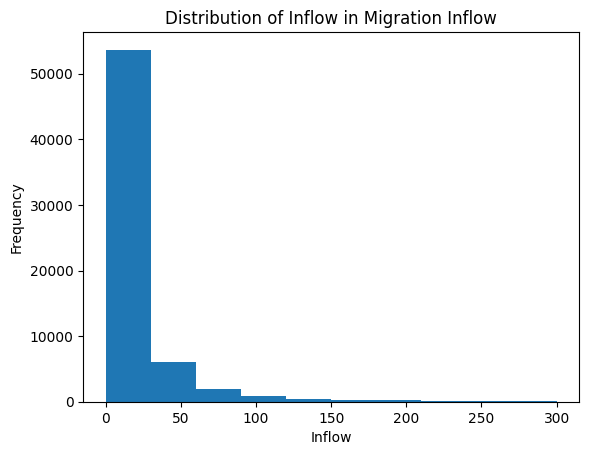

In [58]:
import matplotlib.pyplot as plt

plt.hist(migration['inflow'], range=(0, 300))
plt.xlabel('Inflow')
plt.ylabel('Frequency')
plt.title('Distribution of Inflow in Migration Inflow')
plt.show()

In [61]:
inflow_migration_filtered = inflow_migration[inflow_migration['inflow'] >= 100]
inflow_migration_filtered = inflow_migration_filtered.sort_values(by='inflow', ascending=False)
len(inflow_migration_filtered)

1936

In [62]:
inflow_migration_filtered

,state_code_A,county_code_A,state_code_B,county_code_B,state_name_A,county_name_A,state_name_B,county_name_B,state_short_name_A,state_short_name_B,inflow,id_A,id_B
28204,006,037,036,061,California,Los Angeles County,New York,New York County,CA,NY,5267.0,CA_037,NY_061
28187,006,037,036,047,California,Los Angeles County,New York,Kings County,CA,NY,3552.0,CA_037,NY_047
65624,010,003,042,101,Delaware,New Castle County,Pennsylvania,Philadelphia County,DE,PA,2250.0,DE_003,PA_101
460876,038,017,027,027,North Dakota,Cass County,Minnesota,Clay County,ND,MN,2194.0,ND_017,MN_027
120122,017,031,036,061,Illinois,Cook County,New York,New York County,IL,NY,1969.0,IL_031,NY_061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348007,032,003,036,055,Nevada,Clark County,New York,Monroe County,NV,NY,100.0,NV_003,NY_055
393617,035,043,026,125,New Mexico,Sandoval County,Michigan,Oakland County,NM,MI,100.0,NM_043,MI_125
30902,006,059,026,037,California,Orange County,Michigan,Clinton County,CA,MI,100.0,CA_059,MI_037
572177,045,013,034,041,South Carolina,Beaufort County,New Jersey,Warren County,SC,NJ,100.0,SC_013,NJ_041


In [63]:
inflow_migration_filtered[['id_A', 'id_B', 'inflow', 'county_name_A', 'county_name_B']].head(10)

,id_A,id_B,inflow,county_name_A,county_name_B
28204,CA_037,NY_061,5267.0,Los Angeles County,New York County
28187,CA_037,NY_047,3552.0,Los Angeles County,Kings County
65624,DE_003,PA_101,2250.0,New Castle County,Philadelphia County
460876,ND_017,MN_027,2194.0,Cass County,Clay County
120122,IL_031,NY_061,1969.0,Cook County,New York County
36265,CA_075,NY_061,1816.0,San Francisco County,New York County
81561,FL_086,NY_047,1710.0,Miami-Dade County,Kings County
658328,WA_033,NY_047,1452.0,King County,Kings County
81568,FL_086,NY_061,1435.0,Miami-Dade County,New York County
27696,CA_037,MA_025,1421.0,Los Angeles County,Suffolk County


In [86]:
inflow_migration_filtered.dropna(inplace=True)
inflow_migration_filtered.isna().sum()

state_code_A          0
county_code_A         0
state_code_B          0
county_code_B         0
state_name_A          0
county_name_A         0
state_name_B          0
county_name_B         0
state_short_name_A    0
state_short_name_B    0
inflow                0
id_A                  0
id_B                  0
dtype: int64

In [88]:
len(inflow_migration_filtered)

1901

In [91]:
import numpy as np

# Sort the DataFrame by inflow column
sorted_df = inflow_migration_filtered.sort_values(by='inflow', ascending=False)

# Calculate the 80% threshold
threshold = np.percentile(sorted_df['inflow'], 90)

# Get the rows with inflow values above the threshold
filtered_df = sorted_df[sorted_df['inflow'] > threshold]

len(filtered_df)

190

In [96]:
import pandas as pd
import json

# Sample data to simulate 'inflow_migration_filtered' DataFrame
# Uncomment the line below to load your actual data
# inflow_migration_filtered = pd.read_csv("inflow_top.csv")  # Load your CSV file

# Create nodes
all_ids = pd.concat([filtered_df['id_A'], filtered_df['id_B']]).unique()
id_to_name = pd.concat([filtered_df[['id_A', 'county_name_A']].rename(columns={'id_A': 'id', 'county_name_A': 'name'}),
                        filtered_df[['id_B', 'county_name_B']].rename(columns={'id_B': 'id', 'county_name_B': 'name'})]
                      ).drop_duplicates().set_index('id')['name'].to_dict()
nodes = pd.DataFrame({'id': all_ids})
nodes['name'] = nodes['id'].map(id_to_name)

# Create links
links = filtered_df[['id_A', 'id_B', 'inflow']].rename(columns={'id_A': 'source', 'id_B': 'target'})

# Convert to JSON format
graph_data = {
    "nodes": nodes.to_dict(orient='records'),
    "links": links.to_dict(orient='records')
}

# Save as JSON
output_path = 'graph_data_inflow.json'  # Specify the output file path
with open(output_path, 'w') as f:
    json.dump(graph_data, f, indent=2)

print(f"JSON file saved at {output_path}")


JSON file saved at graph_data_inflow.json


## Generating data for the graph

In [94]:
import pandas as pd
import json

# Sample data to simulate 'inflow_migration_filtered' DataFrame
# Uncomment the line below to load your actual data
# inflow_migration_filtered = pd.read_csv("inflow_top.csv")  # Load your CSV file

# Create nodes
all_ids = pd.concat([inflow_migration_filtered['id_A'], inflow_migration_filtered['id_B']]).unique()
id_to_name = pd.concat([inflow_migration_filtered[['id_A', 'county_name_A']].rename(columns={'id_A': 'id', 'county_name_A': 'name'}),
                        inflow_migration_filtered[['id_B', 'county_name_B']].rename(columns={'id_B': 'id', 'county_name_B': 'name'})]
                      ).drop_duplicates().set_index('id')['name'].to_dict()
nodes = pd.DataFrame({'id': all_ids})
nodes['name'] = nodes['id'].map(id_to_name)

# Create links
links = inflow_migration_filtered[['id_A', 'id_B', 'inflow']].rename(columns={'id_A': 'source', 'id_B': 'target'})

# Convert to JSON format
graph_data = {
    "nodes": nodes.to_dict(orient='records'),
    "links": links.to_dict(orient='records')
}

# Save as JSON
output_path = 'graph_data_inflow.json'  # Specify the output file path
with open(output_path, 'w') as f:
    json.dump(graph_data, f, indent=2)

print(f"JSON file saved at {output_path}")



JSON file saved at graph_data_inflow.json


In [93]:
inflow_migration

,state_code_A,county_code_A,state_code_B,county_code_B,state_name_A,county_name_A,state_name_B,county_name_B,state_short_name_A,state_short_name_B,inflow,id_A,id_B
77,001,001,026,077,Alabama,Autauga County,Michigan,Kalamazoo County,AL,MI,28.0,AL_001,MI_077
78,001,001,027,159,Alabama,Autauga County,Minnesota,Wadena County,AL,MN,4.0,AL_001,MN_159
88,001,001,034,005,Alabama,Autauga County,New Jersey,Burlington County,AL,NJ,0.0,AL_001,NJ_005
89,001,001,034,035,Alabama,Autauga County,New Jersey,Somerset County,AL,NJ,7.0,AL_001,NJ_035
130,001,001,055,141,Alabama,Autauga County,Wisconsin,Wood County,AL,WI,3.0,AL_001,WI_141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716783,072,153,036,061,Puerto Rico,Yauco Municipio,New York,New York County,NaN,NY,31.0,nan_153,NY_061
716787,072,153,042,029,Puerto Rico,Yauco Municipio,Pennsylvania,Chester County,NaN,PA,0.0,nan_153,PA_029
716788,072,153,042,043,Puerto Rico,Yauco Municipio,Pennsylvania,Dauphin County,NaN,PA,0.0,nan_153,PA_043
716789,072,153,042,071,Puerto Rico,Yauco Municipio,Pennsylvania,Lancaster County,NaN,PA,0.0,nan_153,PA_071


In [81]:
labels = inflow_migration[['id_A','county_code_A', 'county_name_A', 'state_code_A' ,'state_name_A']].drop_duplicates()
labels

,id_A,county_code_A,county_name_A,state_code_A,state_name_A
77,AL_001,001,Autauga County,001,Alabama
308,AL_003,003,Baldwin County,001,Alabama
522,AL_005,005,Barbour County,001,Alabama
591,AL_007,007,Bibb County,001,Alabama
656,AL_009,009,Blount County,001,Alabama
...,...,...,...,...,...
716577,nan_145,145,Vega Baja Municipio,072,Puerto Rico
716651,nan_147,147,Vieques Municipio,072,Puerto Rico
716671,nan_149,149,Villalba Municipio,072,Puerto Rico
716718,nan_151,151,Yabucoa Municipio,072,Puerto Rico


In [82]:
labels.to_csv('labels.csv', index=False)

In [72]:
unique_id_A = inflow_migration['id_A'].nunique()
unique_id_A

2353

In [74]:
unique_id_B = inflow_migration['id_B'].nunique()
unique_id_B

459